https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.chirp.html
scipy.signal.chirp
scipy.signal.chirp(t, f0, t1, f1, method='linear', phi=0, vertex_zero=True)[source]
Frequency-swept cosine generator.

In the following, ‘Hz’ should be interpreted as ‘cycles per unit’; there is no requirement here that the unit is one second. The important distinction is that the units of rotation are cycles, not radians. Likewise, t could be a measurement of space instead of time.

In [1]:
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np

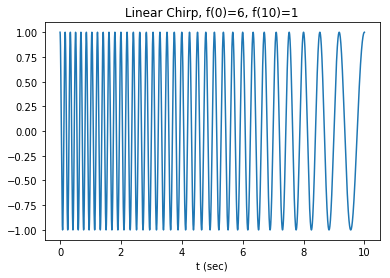

In [2]:

t = np.linspace(0, 10, 5001)
w = chirp(t, f0=6, f1=1, t1=10, method='linear')
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')
plt.show()

For the remaining examples, we’ll use higher frequency ranges, and demonstrate the result using scipy.signal.spectrogram. We’ll use a 10 second interval sampled at 8000 Hz.

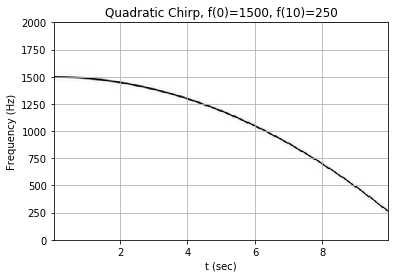

In [5]:
fs = 8000
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=1500, f1=250, t1=10, method='quadratic')

ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,
                          nfft=2048)
plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Quadratic Chirp, f(0)=1500, f(10)=250')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

Quadratic chirp from 1500 Hz to 250 Hz over 10 seconds (vertex of the parabolic curve of the frequency is at t=10):

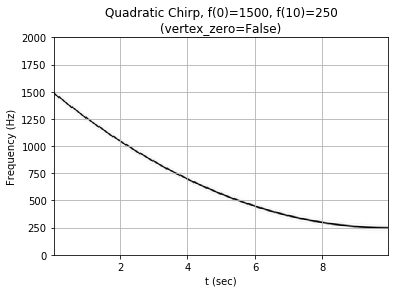

In [6]:
w = chirp(t, f0=1500, f1=250, t1=10, method='quadratic',
          vertex_zero=False)
ff, tt, Sxx = spectrogram(w, fs=fs, noverlap=256, nperseg=512,
                          nfft=2048)
plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Quadratic Chirp, f(0)=1500, f(10)=250\n' +
          '(vertex_zero=False)')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.show()

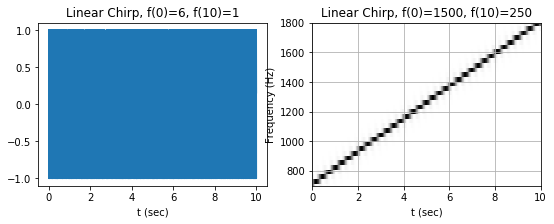

In [5]:
fs = 8000   #resolution
T = 10
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=70*10, f1=1800, t1=10, method='linear')

plt.figure(1, figsize=(9, 3))
plt.subplot(121)
plt.plot(t, w)
plt.title("Linear Chirp, f(0)=6, f(10)=1")
plt.xlabel('t (sec)')

plt.subplot(122)
ff, tt, Sxx = spectrogram(w, fs=fs)
plt.pcolormesh(tt, ff[:513], Sxx[:513], cmap='gray_r')
# plt.pcolormesh(tt+3, ff[:513], Sxx[:513], cmap='gray_r')
plt.title('Linear Chirp, f(0)=1500, f(10)=250')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim(700,1800)
plt.xlim(0,10)
plt.grid()
plt.show()

1025 624 639600


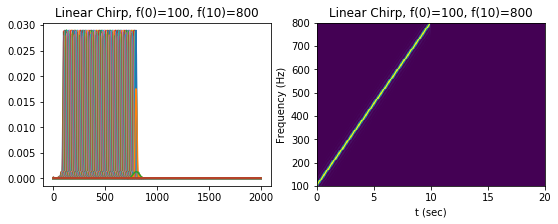

In [8]:
fs = 8000
T = 10
f0=100
f1=800

t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=f0, f1=f1, t1=10, method='linear')

# print(type(w),w.size)
z=np.zeros(w.size) #give a zero array
w2 = np.concatenate((w,z)) 
# print(w2.size)

ff, tt, Sxx = spectrogram(w2, fs=fs,noverlap=256, nperseg=512,
                          nfft=2048)

plt.figure(1, figsize=(9, 3))

plt.subplot(121)
plt.plot(ff[:512],Sxx[:512])
plt.title("Linear Chirp, f(0)=100, f(10)=800")


plt.subplot(122)

print(ff.size,tt.size,Sxx.size)
plt.pcolormesh(tt, ff, Sxx)




plt.title('Linear Chirp, f(0)=100, f(10)=800')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim(f0,f1)
plt.xlim(0,20)

plt.show()

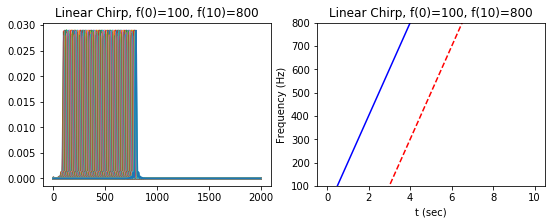

In [98]:
fs = 8000
T = 10
f0=100
f1=800

t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=f0, f1=f1, t1=10, method='linear')


# t1 = np.linspace(5, T+5, T*fs, endpoint=False)
# w1 = chirp(t1, f0=f0, f1=f1, t1=10, method='linear')
# print(type(w),w.size)
z=np.zeros(w.size) #give a zero array
w2 = np.concatenate((w,z)) #connect w and z
# print(w2[:20])
w2= np.roll(w2,fs*2)
# print(w2[:20])
# w2 =w + w1
# print(w2.size)

ff, tt, Sxx = spectrogram(w, fs=fs,noverlap=256, nperseg=512,nfft=2048)
ff1,tt1,Sxx1= spectrogram(w2, fs=fs,noverlap=256, nperseg=512, nfft=2048) 
                                                  

plt.figure(1, figsize=(9, 3))

plt.subplot(121)
plt.plot(ff[:512],Sxx[:512])
plt.title("Linear Chirp, f(0)=100, f(10)=800")



plt.subplot(122)

# print(ff.size,tt.size,Sxx.size)
# plt.pcolormesh(tt, ff[:512],Sxx[:512])
# print(Sxx[:100])
t=np.linspace(0, T, 512)
# plt.plot(t,ff[:512],'r--',t,ff1[:512],'b')
df= np.concatenate((ff1,np.zeros(ff1.size)))
ff1= w2= np.roll(df,128)  # shift ff1 128 bit
plt.plot(t,ff[:512],'b')
plt.plot(t,ff1[:512],'r--')
# plt.plot(t+5,ff[:512],'b')
# plt.plot(t+7,ff1[:512],'r--')

plt.title('Linear Chirp, f(0)=100, f(10)=800')
plt.xlabel('t (sec)')
plt.ylabel('Frequency (Hz)')
plt.ylim(f0,f1)
# plt.xlim(0,20)

plt.show()

1953.125 1953.125


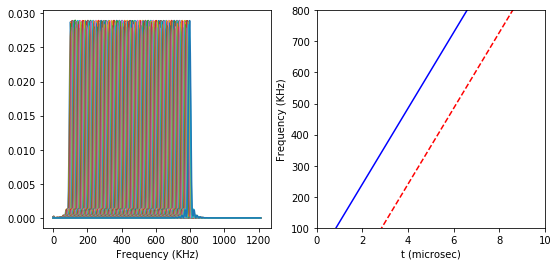

In [79]:
fs = 8000
T = 10    #chirp time
f0=100    #chirp begin frequency
f1=800    #chirp end frequency
d= 100 #distance  is 100 m
c = 3*1e8

time_delay= 2*d/c

t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=f0, f1=f1, t1=T, method='linear')

w1 = chirp(t, f0=f0, f1=f1, t1=T, phi=45,method='linear')
# t1 = np.linspace(5, T+5, T*fs, endpoint=False)
# w1 = chirp(t1, f0=f0, f1=f1, t1=10, method='linear')
# print(type(w),w.size)
# z=np.zeros(w.size) #give a zero array
# w2 = np.concatenate((w,z)) #connect w and z
# # print(w2[:20])
# w2= np.roll(w2,fs*2)
# print(w2[:20])
# w2 =w + w1
# print(w2.size)

ff, tt, Sxx = spectrogram(w, fs=fs,noverlap=256, nperseg=512,nfft=2048)
ff1,tt1,Sxx1= spectrogram(w1, fs=fs,noverlap=256, nperseg=512, nfft=2048) 
                                                  

plt.figure(1, figsize=(9, 4))

plt.subplot(121)
plt.plot(ff[:tt.size],Sxx[:tt.size])
# plt.title("Linear Chirp, f(0)=100, f(10)=800")
plt.xlabel('Frequency (KHz)')


plt.subplot(122)

# print(ff.size,tt.size,Sxx.size)
# plt.pcolormesh(tt, ff[:512],Sxx[:512])
# print(Sxx[:100])
t=np.linspace(0, T, 512)
t1= t + 1
# plt.plot(t,ff[:512],'r--',t,ff1[:512],'b')
# df= np.concatenate((ff1,np.zeros(ff1.size)))
# ff1= w2= np.roll(df,128)  # shift ff1 128 bit

plt.plot(tt,ff[:tt.size],'b')
plt.plot(tt+2,ff1[:tt.size],'r--')



print(ff[500],ff1[500])

# plt.title('Linear Chirp, f(0)=100, f(10)=800')
plt.xlabel('t (microsec)')
plt.ylabel('Frequency (KHz)')
plt.ylim(f0,f1)
plt.xlim(0,10)
plt.savefig('Linear Chirp Signal.png', dpi=300)

plt.show()

Target Range = 300.0 m.
Time cost: 0.0000020 s


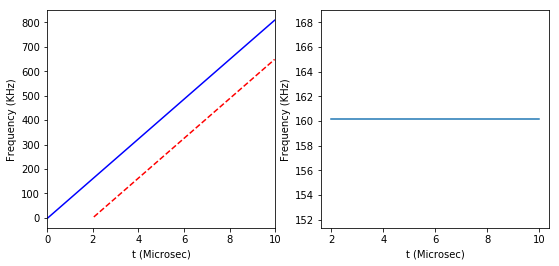

Simulation Target Range = 300.29297 m.


In [19]:
# simulation two chirp signal 
# object distance is d(300m)
from scipy.signal import chirp, spectrogram
import matplotlib.pyplot as plt
import numpy as np
fs = 8000
T = 10    #chirp time
f0=100    #chirp begin frequency
f1=800    #chirp end frequency
d= 300    #distance  is 100 m
c = 3*1e8
 
time_delay= 2*d/c  


def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]


print('Target Range = %3.1f m.' %d);
print('Time cost: %3.7f s' %time_delay)
t = np.linspace(0, T, T*fs, endpoint=False)
w = chirp(t, f0=f0, f1=f1, t1=T, method='linear')

w1 = chirp(t, f0=f0, f1=f1, t1=T, phi=45,method='linear')


ff, tt, Sxx = spectrogram(w, fs=fs,noverlap=128, nperseg=512,nfft=2048)
ff1,tt1,Sxx1= spectrogram(w1, fs=fs,noverlap=256, nperseg=512, nfft=2048) 
                                                  

plt.figure(1, figsize=(9, 4))

plt.subplot(121)
z=np.zeros(int(time_delay*1e6* tt.size /T)) #make  a zero array size is time_delay* tt.size /T   :40
ff1= np.concatenate((z,ff))
ff3=zero_to_nan(ff1)    # change 0 to 'nan' 
plt.plot(tt,ff[:tt.size],'b')
plt.plot(tt,ff3[:tt.size],'r--')
plt.xlabel('t (Microsec)')
plt.ylabel('Frequency (KHz)')
# plt.ylim(f0,f1)
plt.xlim(0,10)


plt.subplot(122)
plt.figure(1, figsize=(5, 4))
t = np.linspace(2, T, (T-2)*100)
plt.plot(t,ff[100:900]-ff1[100:900])
plt.ylabel('Frequency (KHz)')
plt.xlabel('t (Microsec)')
plt.savefig('Linear Chirp Signal.png', dpi=300)
plt.show()

t_back = 10*(ff[100]-ff1[100])/800 #simulation the cost time us
d_back = t_back*1e-6*c/2
print ('Simulation Target Range = %3.5f m.' %d_back)

800


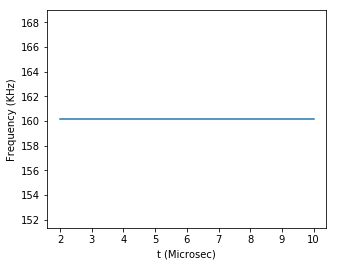

Target Range = 300.29297 m.


In [122]:
# If frequency
plt.figure(1, figsize=(5, 4))
t = np.linspace(2, T, (T-2)*100)
print (t.size)
plt.plot(t,ff[100:900]-ff1[100:900])
plt.ylabel('Frequency (KHz)')
plt.xlabel('t (Microsec)')

# plt.savefig('IF frequence.png', dpi=300)
plt.show()

t_back = 10*(ff[100]-ff1[100])/800  #simulation the cost time us
d_back = t_back*1e-6*c/2
print ('Target Range = %3.5f m.' %d_back)
# print(np.nonzero(ff1)) #return fist nonzero data

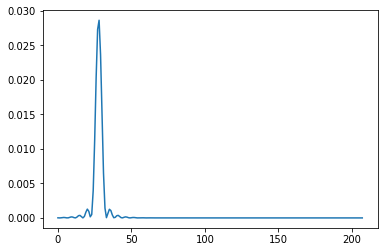

In [137]:
def zero_to_nan(values):
    """Replace every 0 with 'nan' and return a copy."""
    return [float('nan') if x==0 else x for x in values]
ff3=zero_to_nan(ff1)

plt.plot(Sxx[50])

In [4]:

w = chirp(t, f0=f0, f1=f1, t1=T, method='linear')

w1 = chirp(t, f0=f0, f1=f1, t1=T, phi=45,method='linear')

w2 = chirp(t, f0=f0, f1=f1, t1=T, phi=90,method='linear')

In [10]:
# calculate initial phase


from scipy.fftpack import fft, ifft
import numpy as np
from scipy.signal import chirp


t = np.linspace(0, 10, 5001)

n= 4 # 1/n *pi  initial phase


# s_sine= np.sin(50.0 * 2.0*np.pi*t)          #sin
# s_cosine=np.sin(50.0 * 2.0*np.pi*t+np.pi/2)   #cosin 
s_sine = chirp(t, f0=100, f1=150, t1=10, method='linear')
s_cosine=chirp(t, f0=100, f1=150, t1=10, phi=90,method='linear')
# r = np.sin(50.0 * 2.0*np.pi*t)
# r2 = np.sin(50.0 * 2.0*np.pi*t+np.pi/n)  #receive signal
r2 = chirp(t, f0=100, f1=150, t1=10, phi=180/n,method='linear')

qua_phase = r2*s_sine    # receive signal multiply sin signal  Quadrature phase
in_phase=  r2*s_cosine    # receive signal multiply cosin signal in phase

# plt.plot(t[:50],in_phase[:50],'r')
# plt.plot(t[:50],qua_phase[:50],'b')
# plt.grid()
# plt.show()

fft_signal=fft(r2)
fft_in_phase = fft(in_phase)  #in phase
fft_qua_phase= fft(qua_phase)  #quadrature phase


initial_phase=np.real(np.arctan(fft_qua_phase[0]/fft_in_phase[0])/np.pi)
initial_phase =1/(0.5-initial_phase)

print('Initial Phase was:1/%.1f'%initial_phase, '*pi')

Initial Phase was:1/4.0 *pi


$Δ𝛷 = 2𝜋Δ𝑑/𝜆$


In [31]:
f_c =ff[100]-ff1[100]
lambda_c= c/f_c
l = lambda_c/2

deta_d=
deta_phi = 2*np.pi*deta_d/lambda_c
theta_0 = 2*np.pi*f_c*time_delay
deta_theta= (2*np.pi*d*f_c)/c   #deta theta
phi = lambda_c*deta_theta/(2*np.pi*l)
print(phi,lambda_c) 

0.0003203125 1873170.731707317
